# Feature Engineering



## Objectives

*   Engineer features for Regression model


## Inputs

* inputs/datasets/cleaned/test_df_cleaned.pkl
* inputs/datasets/cleaned/train_df_cleaned.pkl

## Outputs

* generate a list with variables to engineer

## Conclusions

* Feature Engineering Transformers
* 
* 

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir


'/workspace/Film_Hit_prediction'

---

# Load Cleaned Data

Train Set

In [25]:
import os
import pandas as pd

# Correct path relative to the current directory
Train_set_path = "/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/train_df_cleaned.pkl"

try:
    TrainSet = pd.read_pickle(Train_set_path)
    print(TrainSet.head(3))
    print("Shape of the dataframe:", TrainSet.shape)
except FileNotFoundError:
    print(f"File not found at path: {Train_set_path}")

          budget     revenue  runtime  language_encoded  Action  Adventure  \
4688         0.0         0.0     87.0               7.0     0.0        0.0   
2951  11000000.0  32935319.0    105.0               7.0     0.0        0.0   
4071   2000000.0  78898765.0    115.0               7.0     1.0        1.0   

      Animation  Comedy  Crime  Documentary  ...  cast_Woody Harrelson  \
4688        0.0     0.0    0.0          0.0  ...                   0.0   
2951        0.0     0.0    0.0          0.0  ...                   0.0   
4071        0.0     0.0    0.0          0.0  ...                   0.0   

      cast_Xander Berkeley  cast_Yasiin Bey  cast_Yul Vazquez  cast_Zac Efron  \
4688                   0.0              0.0               0.0             0.0   
2951                   0.0              0.0               0.0             0.0   
4071                   0.0              0.0               0.0             0.0   

      cast_Zach Galifianakis  cast_Zeljko Ivanek  cast_Zoe Saldan

Test Set

In [26]:
import os
import pandas as pd

# Correct path relative to the current directory
Test_set_path = "/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/test_df_cleaned.pkl"

try:
    TestSet = pd.read_pickle(Test_set_path)
    print(TestSet.head(3))
    print("Shape of the dataframe:", TestSet.shape)
except FileNotFoundError:
    print(f"File not found at path: {Test_set_path}")

          budget     revenue  runtime  language_encoded  Action  Adventure  \
596   70000000.0  33561137.0     97.0               7.0     1.0        1.0   
3372         7.0         5.0     90.0               7.0     1.0        0.0   
2702  14000000.0   5108820.0     90.0               7.0     0.0        0.0   

      Animation  Comedy  Crime  Documentary  ...  cast_Woody Harrelson  \
596         0.0     1.0    0.0          0.0  ...                   0.0   
3372        0.0     0.0    1.0          0.0  ...                   0.0   
2702        0.0     0.0    0.0          0.0  ...                   0.0   

      cast_Xander Berkeley  cast_Yasiin Bey  cast_Yul Vazquez  cast_Zac Efron  \
596                    0.0              0.0               0.0             0.0   
3372                   0.0              0.0               0.0             0.0   
2702                   0.0              0.0               0.0             0.0   

      cast_Zach Galifianakis  cast_Zeljko Ivanek  cast_Zoe Saldan

# Data Exploration

Evaluate potential transformations to be made


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

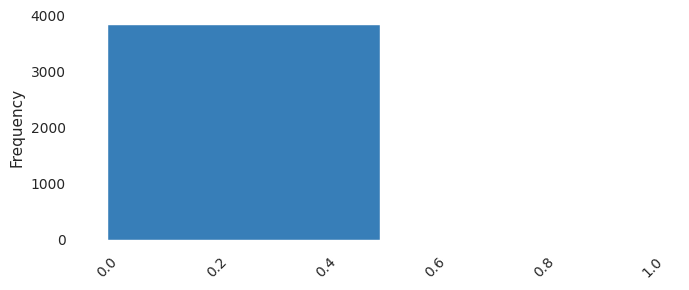

In [28]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

# Correlation and PPS Analysis

* We don’t expect changes compared to the data cleaning notebook 

# Feature Engineering

## Custom function


Missing values check:
X_train_final: 0
X_test_final: 0
y_train_final: 0
y_test_final: 0

Infinite values check:
X_train_final: 0
X_test_final: 0
y_train_final: 0
y_test_final: 0

Value ranges:
X_train_final budget_scaled range: -10.566491748079066 to 1.2644586201982062
y_train_final range: -1.6666349881776625 to 0.8799261270469829


In [10]:
X_train_final, X_test_final, y_train_final, y_test_final, le_language, scaler, scaler_y = engineer_film_features(X_train, X_test, y_train, y_test)

Starting feature engineering...
Removing outliers...
Rows remaining after outlier removal: 2054 out of 3842
Processing languages...
Processing budget...
Genre columns found: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
Combining features...
Processing revenue...

Final shapes:
X_train_final: (2054, 22)
X_test_final: (961, 22)
y_train_final: (2054, 1)
y_test_final: (961, 1)


In [13]:
import os
import joblib
import pandas as pd

# Create output directory
output_path = "/workspace/Film_Hit_prediction/outputs/datasets/engineered/"
os.makedirs(output_path, exist_ok=True)

print("Checking data before saving:")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")
print(f"y_train_final shape: {pd.DataFrame(y_train_final).shape}")
print(f"y_test_final shape: {pd.DataFrame(y_test_final).shape}")
print(f"le_language classes: {le_language.classes_ if hasattr(le_language, 'classes_') else 'No classes found'}")
print(f"scaler: {type(scaler)}")
print(f"scaler_y: {type(scaler_y)}")

try:
# Save processed datasets
    X_train_final.to_csv(output_path + 'X_train_final.csv', index=False)
    print("✓ Saved X_train_final.csv")

    X_test_final.to_csv(output_path + 'X_test_final.csv', index=False)
    print("✓ Saved X_test_final.csv")

    pd.DataFrame(y_train_final).to_csv(output_path + 'y_train_final.csv', index=False)
    print("✓ Saved y_train_final.csv")

    pd.DataFrame(y_test_final).to_csv(output_path + 'y_test_final.csv', index=False)
    print("✓ Saved y_test_final.csv")

# Save encoders and scalers
    joblib.dump(le_language, output_path + 'language_encoder.joblib')
    print("✓ Saved language_encoder.joblib")

    joblib.dump(scaler, output_path + 'budget_scaler.joblib')
    print("✓ Saved budget_scaler.joblib")

    joblib.dump(scaler_y, output_path + 'revenue_scaler.joblib')
    print("✓ Saved revenue_scaler.joblib")

except Exception as e:
    print(f"Error occurred while saving: {str(e)}")

    # Verify files after saving
    print("\nChecking saved files:")
    files = os.listdir(output_path)
    print(f"Files in directory: {files}")
    print(f"Number of files saved: {len(files)}")

# Verify file sizes
    for file in files:
        file_path = os.path.join(output_path, file)
        size = os.path.getsize(file_path)
        print(f"{file}: {size} bytes")

Checking data before saving:
X_train_final shape: (2054, 22)
X_test_final shape: (961, 22)
y_train_final shape: (2054, 1)
y_test_final shape: (961, 1)
le_language classes: ['af' 'cn' 'cs' 'da' 'de' 'en' 'es' 'fa' 'fr' 'he' 'hi' 'id' 'is' 'it'
 'ja' 'ko' 'ky' 'nb' 'nl' 'no' 'pl' 'pt' 'ro' 'ru' 'sl' 'sv' 'ta' 'te'
 'th' 'vi' 'xx' 'zh']
scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
scaler_y: <class 'sklearn.preprocessing._data.StandardScaler'>
✓ Saved X_train_final.csv
✓ Saved X_test_final.csv
✓ Saved y_train_final.csv
✓ Saved y_test_final.csv
✓ Saved language_encoder.joblib
✓ Saved budget_scaler.joblib
✓ Saved revenue_scaler.joblib


## Feature Engineering Spreadsheet Summary


- Languages are properly encoded using LabelEncoder
- Genre columnes are already one-hot encoded
- Budget is both log- transformed and scaled
- Saved the encoders and scalers
- Target variable (revenue) is Lon-transformed to handle skewness and scaled using StandardScaler
- Processed datasets are saved.
    



In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

def engineer_movie_features(train_df, test_df):
    print("Starting feature engineering...")

    train_processed = train_df.copy()
    test_processed = test_df.copy()

    # 1. BUDGET FEATURES
    print("\nEngineering budget features...")

    # Remove movies without budget data
    train_processed = train_processed[train_processed['budget'] > 0]
    test_processed = test_processed[test_processed['budget'] > 0]
    
    # Log transform budget
    train_processed['log_budget'] = np.log1p(train_processed['budget'])
    test_processed['log_budget'] = np.log1p(test_processed['budget'])

    # Budget per minute
    train_processed['budget_per_minute'] = train_processed['budget'] / train_processed['runtime'].replace(0, np.nan)
    test_processed['budget_per_minute'] = test_processed['budget'] / test_processed['runtime'].replace(0, np.nan)
    
    print(f"Removed {len(train_df) - len(train_processed)} training movies without budget")
    print(f"Removed {len(test_df) - len(test_processed)} test movies without budget")
    
    # 2. RUNTIME FEATURES
    print("Engineering runtime features...")
     
    